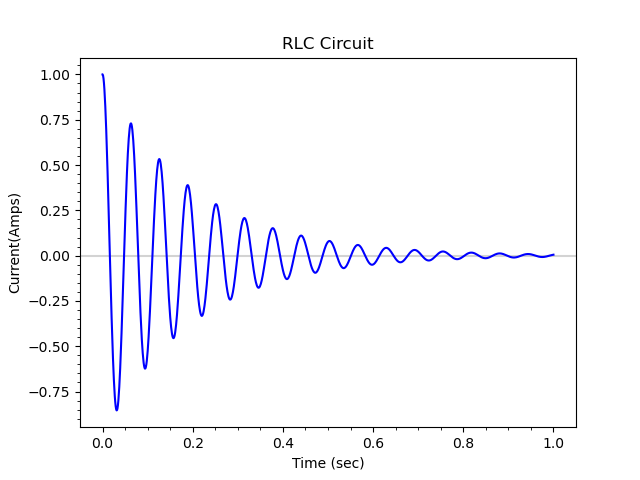

In [31]:
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LinearLocator
from scipy.integrate import solve_ivp


def model(time, state_vector, phase_constant, damping_constant):
    z, current = state_vector  # unpack dependent variables
    #split second DE into two ODE that are sort of nested
    d_z = -damping_constant * z - phase_constant * current 
    d_current = z
    return d_z, d_current


def plot(ax):
    #constants
    r = .1
    l = .01
    c = .01
    # Precalculate phase constant
    phase_constant = 1/(l*c)

    # Set constant that was similar to damping constant in penedulum problem
    a_constant = r/l
    

    # Set initial conditions
    z_initial = 0
    current_initial = 1  # 1 amp

    # Set model duration (seconds)
    time_initial = 0
    time_final = 1

    # Calculate for an underdamped pendulum
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [z_initial, current_initial],
        max_step=0.001,
        args=[phase_constant, a_constant],
    )
    time_steps = sol.t
    current_plot = sol.y[1]



    ax.plot(
        time_steps,
        current_plot,
        color="blue",
        linestyle="solid",
        zorder=3,
    )
   
    ax.set_title("RLC Circuit")
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Current(Amps)")
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()